In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [39]:
data = pd.read_csv('dataset.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [40]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## there is no missing data.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## all the data are either integer or float. Therefore, no categorical data is present in this dataset.

# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [42]:
## independent & dependent features
X = data.iloc[:,:-1]
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [44]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[32  9]
 [ 8 42]]


In [45]:
true_positive= con_mat[0][0]
false_positive=con_mat[0][1]
false_negative=con_mat[1][0]
true_negative=con_mat[1][1]

In [46]:
Accuracy= (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
Accuracy

0.8131868131868132

In [47]:
precision= true_positive/(true_positive+false_positive)
precision

0.7804878048780488

In [48]:
recall=true_positive/(true_positive+false_negative)
recall

0.8

In [49]:
F1_score= 2*(recall*precision)/(recall+precision)
F1_score

0.7901234567901235

# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Top 5 features:
11. Feature 11: 0.14595553925277685
2. Feature 2: 0.1188695014701235
12. Feature 12: 0.10800801954850618
7. Feature 7: 0.10515676802480146
9. Feature 9: 0.10081441751099195


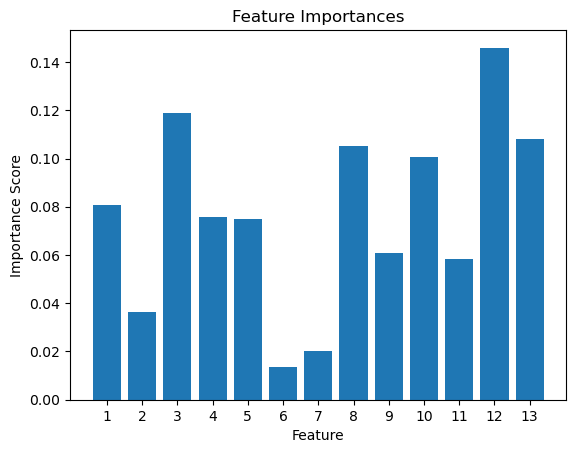

In [50]:
# Get feature importances from the trained random forest classifier
importances = classifier.feature_importances_

# Get the indices of the top 5 most important features
indices = np.argsort(importances)[::-1][:5]

# Print the top 5 most important features and their importance scores
print("Top 5 features:")
for i in indices:
    print(f"{i}. Feature {i}: {importances[i]}")

# Visualize the feature importances using a bar chart
plt.bar(range(X_train.shape[1]), importances)
plt.xticks(range(X_train.shape[1]), range(1, X_train.shape[1]+1))
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()


# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [51]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use grid search with 5-fold cross-validation to find the best set of hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and its cross-validation score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Cross-validation Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_rfc = grid_search.best_estimator_
test_score = best_rfc.score(X_test, y_test)
print(f"Test Set Score: {test_score}")


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation Score: 0.8439645625692137
Test Set Score: 0.8351648351648352


# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, and y_test are the training and test set features and labels respectively

# Create a random forest classifier with default hyperparameters
rfc_default = RandomForestClassifier()

# Train the default random forest classifier on the training set
rfc_default.fit(X_train, y_train)

# Evaluate the default random forest classifier on the test set
y_pred_default = rfc_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

# Print the default model's performance metrics
print("Default Model Performance Metrics:")
print(f"Accuracy: {accuracy_default}")
print(f"Precision: {precision_default}")
print(f"Recall: {recall_default}")
print(f"F1 Score: {f1_default}")

# Create a random forest classifier
rfc = RandomForestClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use grid search with 5-fold cross-validation to find the best set of hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on the test set
best_rfc = grid_search.best_estimator_
y_pred_best = best_rfc.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print the best model's performance metrics
print("Best Model Performance Metrics:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")

# Compare the performance of the tuned model with the default model
print("Performance Comparison:")
print(f"Accuracy Improvement: {accuracy_best - accuracy_default}")
print(f"Precision Improvement: {precision_best - precision_default}")
print(f"Recall Improvement: {recall_best - recall_default}")
print(f"F1 Score Improvement: {f1_best - f1_default}")


Default Model Performance Metrics:
Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168315
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Performance Metrics:
Accuracy: 0.8351648351648352
Precision: 0.8301886792452831
Recall: 0.88
F1 Score: 0.8543689320388349
Performance Comparison:
Accuracy Improvement: 0.02197802197802201
Precision Improvement: 0.006659267480577213
Recall Improvement: 0.040000000000000036
F1 Score Improvement: 0.02268576372200337


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

## feature11 & feature 2 are the two most important features

In [64]:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest classifier on the data
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_test, y_test)

# Define the boundaries of the plot
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = y_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Make predictions on the entire feature space
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random forest decision boundaries')
plt.show()


InvalidIndexError: (slice(None, None, None), 0)